In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('D:\Data Science Projects\Statistical Anomaly Detection\Dataset\WORKING.csv')

In [3]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0
1,PAYMENT,1864.28,21249.00,19384.72,0
2,TRANSFER,181.00,181.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0
...,...,...,...,...,...
1048562,CASH_OUT,132557.35,479803.00,347245.65,0
1048563,PAYMENT,9917.36,90545.00,80627.64,0
1048564,PAYMENT,14140.05,20545.00,6404.95,0
1048565,PAYMENT,10020.05,90605.00,80584.95,0


In [4]:
df.shape

(1048567, 5)

In [5]:
df.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
isFraud           0
dtype: int64

In [6]:
df['type'].value_counts()

CASH_OUT    373640
PAYMENT     353866
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [42]:
df['type'].value_counts()

1    373640
3    353866
0    227130
4     86753
2      7178
Name: type, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['type'] = label.fit_transform(df['type'])

In [8]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,3,9839.64,170136.00,160296.36,0
1,3,1864.28,21249.00,19384.72,0
2,4,181.00,181.00,0.00,1
3,1,181.00,181.00,0.00,1
4,3,11668.14,41554.00,29885.86,0
...,...,...,...,...,...
1048562,1,132557.35,479803.00,347245.65,0
1048563,3,9917.36,90545.00,80627.64,0
1048564,3,14140.05,20545.00,6404.95,0
1048565,3,10020.05,90605.00,80584.95,0


In [9]:
x = df.drop('isFraud',axis=1)
y= df['isFraud']
x,y

(         type     amount  oldbalanceOrg  newbalanceOrig
 0           3    9839.64      170136.00       160296.36
 1           3    1864.28       21249.00        19384.72
 2           4     181.00         181.00            0.00
 3           1     181.00         181.00            0.00
 4           3   11668.14       41554.00        29885.86
 ...       ...        ...            ...             ...
 1048562     1  132557.35      479803.00       347245.65
 1048563     3    9917.36       90545.00        80627.64
 1048564     3   14140.05       20545.00         6404.95
 1048565     3   10020.05       90605.00        80584.95
 1048566     3   11450.03       80584.95        69134.92
 
 [1048567 rows x 4 columns],
 0          0
 1          0
 2          1
 3          1
 4          0
           ..
 1048562    0
 1048563    0
 1048564    0
 1048565    0
 1048566    0
 Name: isFraud, Length: 1048567, dtype: int64)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [11]:
x_train.shape,x_test.shape

((786425, 4), (262142, 4))

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train,x_test

(array([[-5.29675099e-01,  9.21746091e-02, -2.94084645e-01,
         -2.97082229e-01],
        [ 9.58278876e-01, -5.37319586e-01, -2.94084645e-01,
         -2.97082229e-01],
        [-5.29675099e-01,  8.37385892e-01, -2.94084645e-01,
         -2.97082229e-01],
        ...,
        [-5.29675099e-01,  5.29894768e-01, -2.94084645e-01,
         -2.97082229e-01],
        [-5.29675099e-01, -6.53846216e-04, -2.94084645e-01,
         -2.97082229e-01],
        [-5.29675099e-01, -2.94463778e-01, -2.94084645e-01,
         -2.97082229e-01]]),
 array([[ 0.21430189, -0.5778052 , -0.29408464, -0.29708223],
        [ 0.95827888, -0.58408301, -0.29408464, -0.29708223],
        [-0.5296751 ,  0.64172092, -0.2926825 , -0.29708223],
        ...,
        [ 0.95827888, -0.54173515, -0.27993981, -0.28812007],
        [-1.27365209,  0.43373273, -0.1811729 , -0.09444495],
        [-0.5296751 , -0.42916377, -0.29408464, -0.29708223]]))

# Logistic Regression


In [13]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred = model1.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

confusion_matrix_Logistic = confusion_matrix(y_pred,y_test)
classification_report_Logistic = classification_report(y_pred,y_test)
accuracy_score_Logistic = accuracy_score(y_pred,y_test)
print(confusion_matrix_Logistic,classification_report_Logistic,accuracy_score_Logistic)

[[261856    211]
 [    10     65]]               precision    recall  f1-score   support

           0       1.00      1.00      1.00    262067
           1       0.24      0.87      0.37        75

    accuracy                           1.00    262142
   macro avg       0.62      0.93      0.68    262142
weighted avg       1.00      1.00      1.00    262142
 0.9991569454723013


# Decision Tree Classifier 

In [16]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred_Decision = model2.predict(x_test)

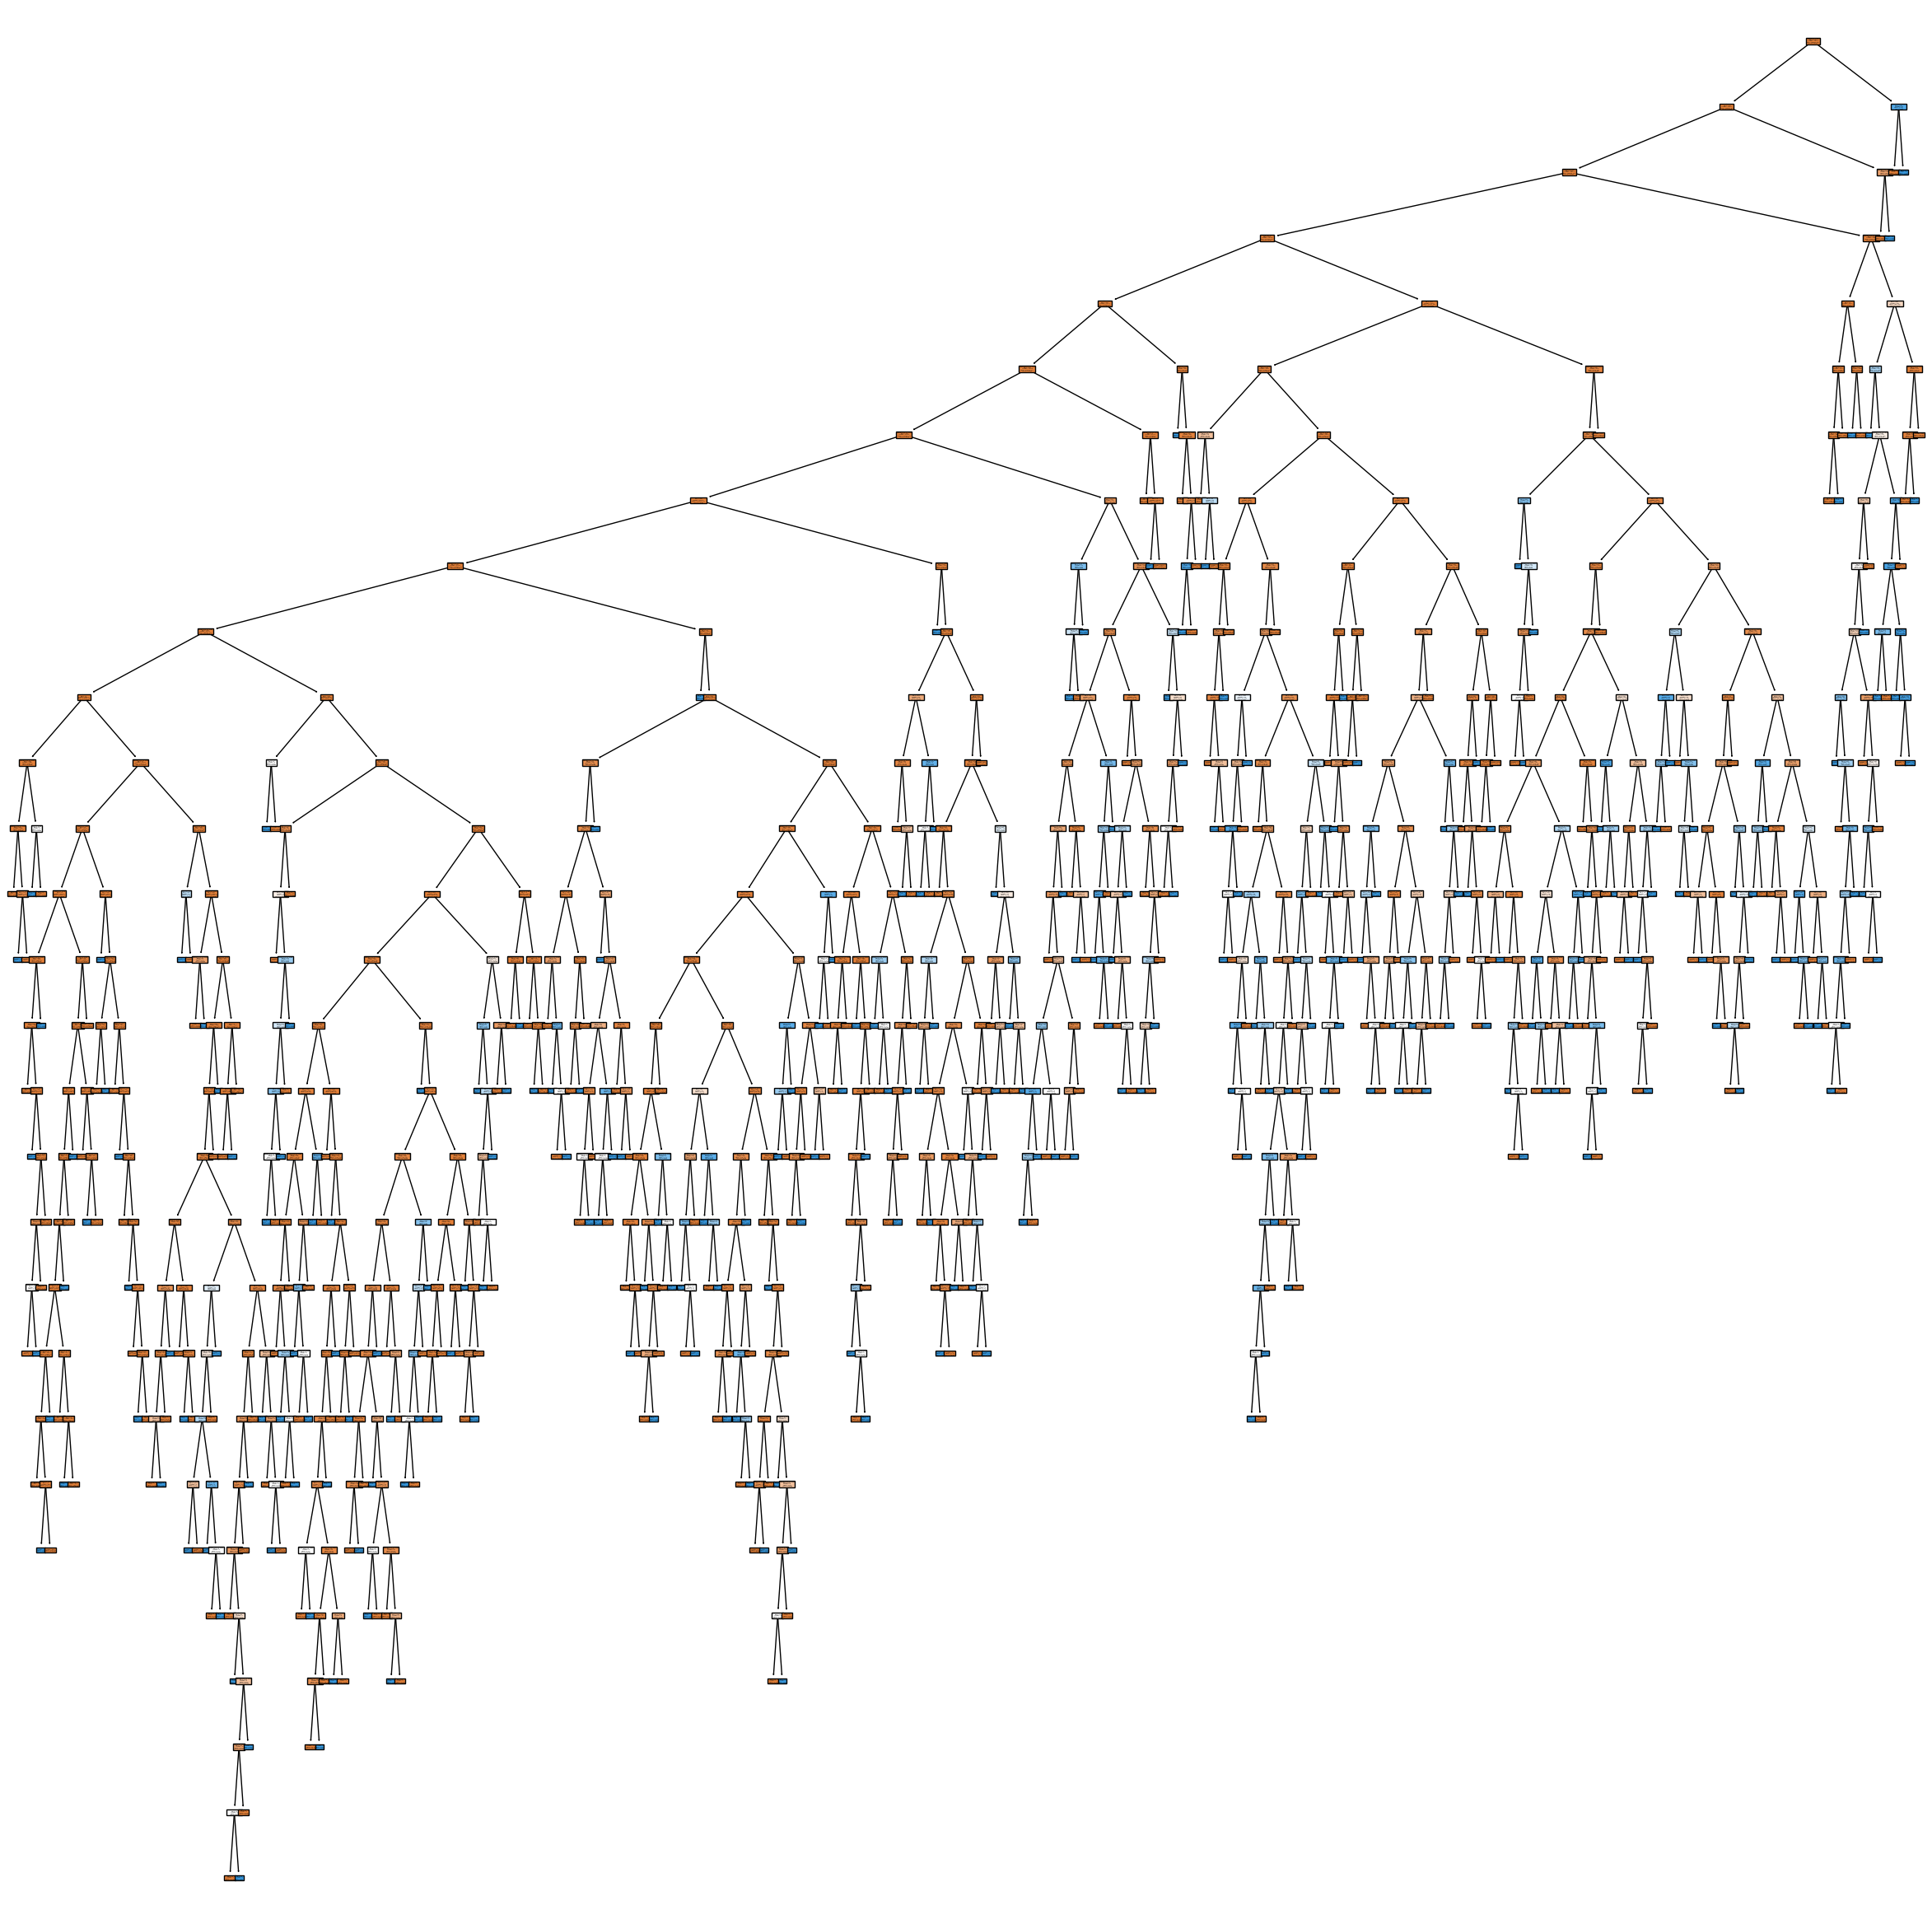

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(30,30))
plot_tree(model2, feature_names=['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig'], class_names=['No Fraud', 'Fraud'], filled=True)
plt.savefig('decision_tree.png')
plt.show()


In [18]:
confusion_matrix_Decision = confusion_matrix(y_pred_Decision,y_test)
classification_report_Decision = classification_report(y_pred_Decision,y_test)
accuracy_score_Decision = accuracy_score(y_pred_Decision,y_test)
print(confusion_matrix_Decision,classification_report_Decision,accuracy_score_Decision)

[[261794     86]
 [    72    190]]               precision    recall  f1-score   support

           0       1.00      1.00      1.00    261880
           1       0.69      0.73      0.71       262

    accuracy                           1.00    262142
   macro avg       0.84      0.86      0.85    262142
weighted avg       1.00      1.00      1.00    262142
 0.999397273233591


#  Random Forest Classifier 


In [19]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred_Random = model3.predict(x_test)
y_pred_Random

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

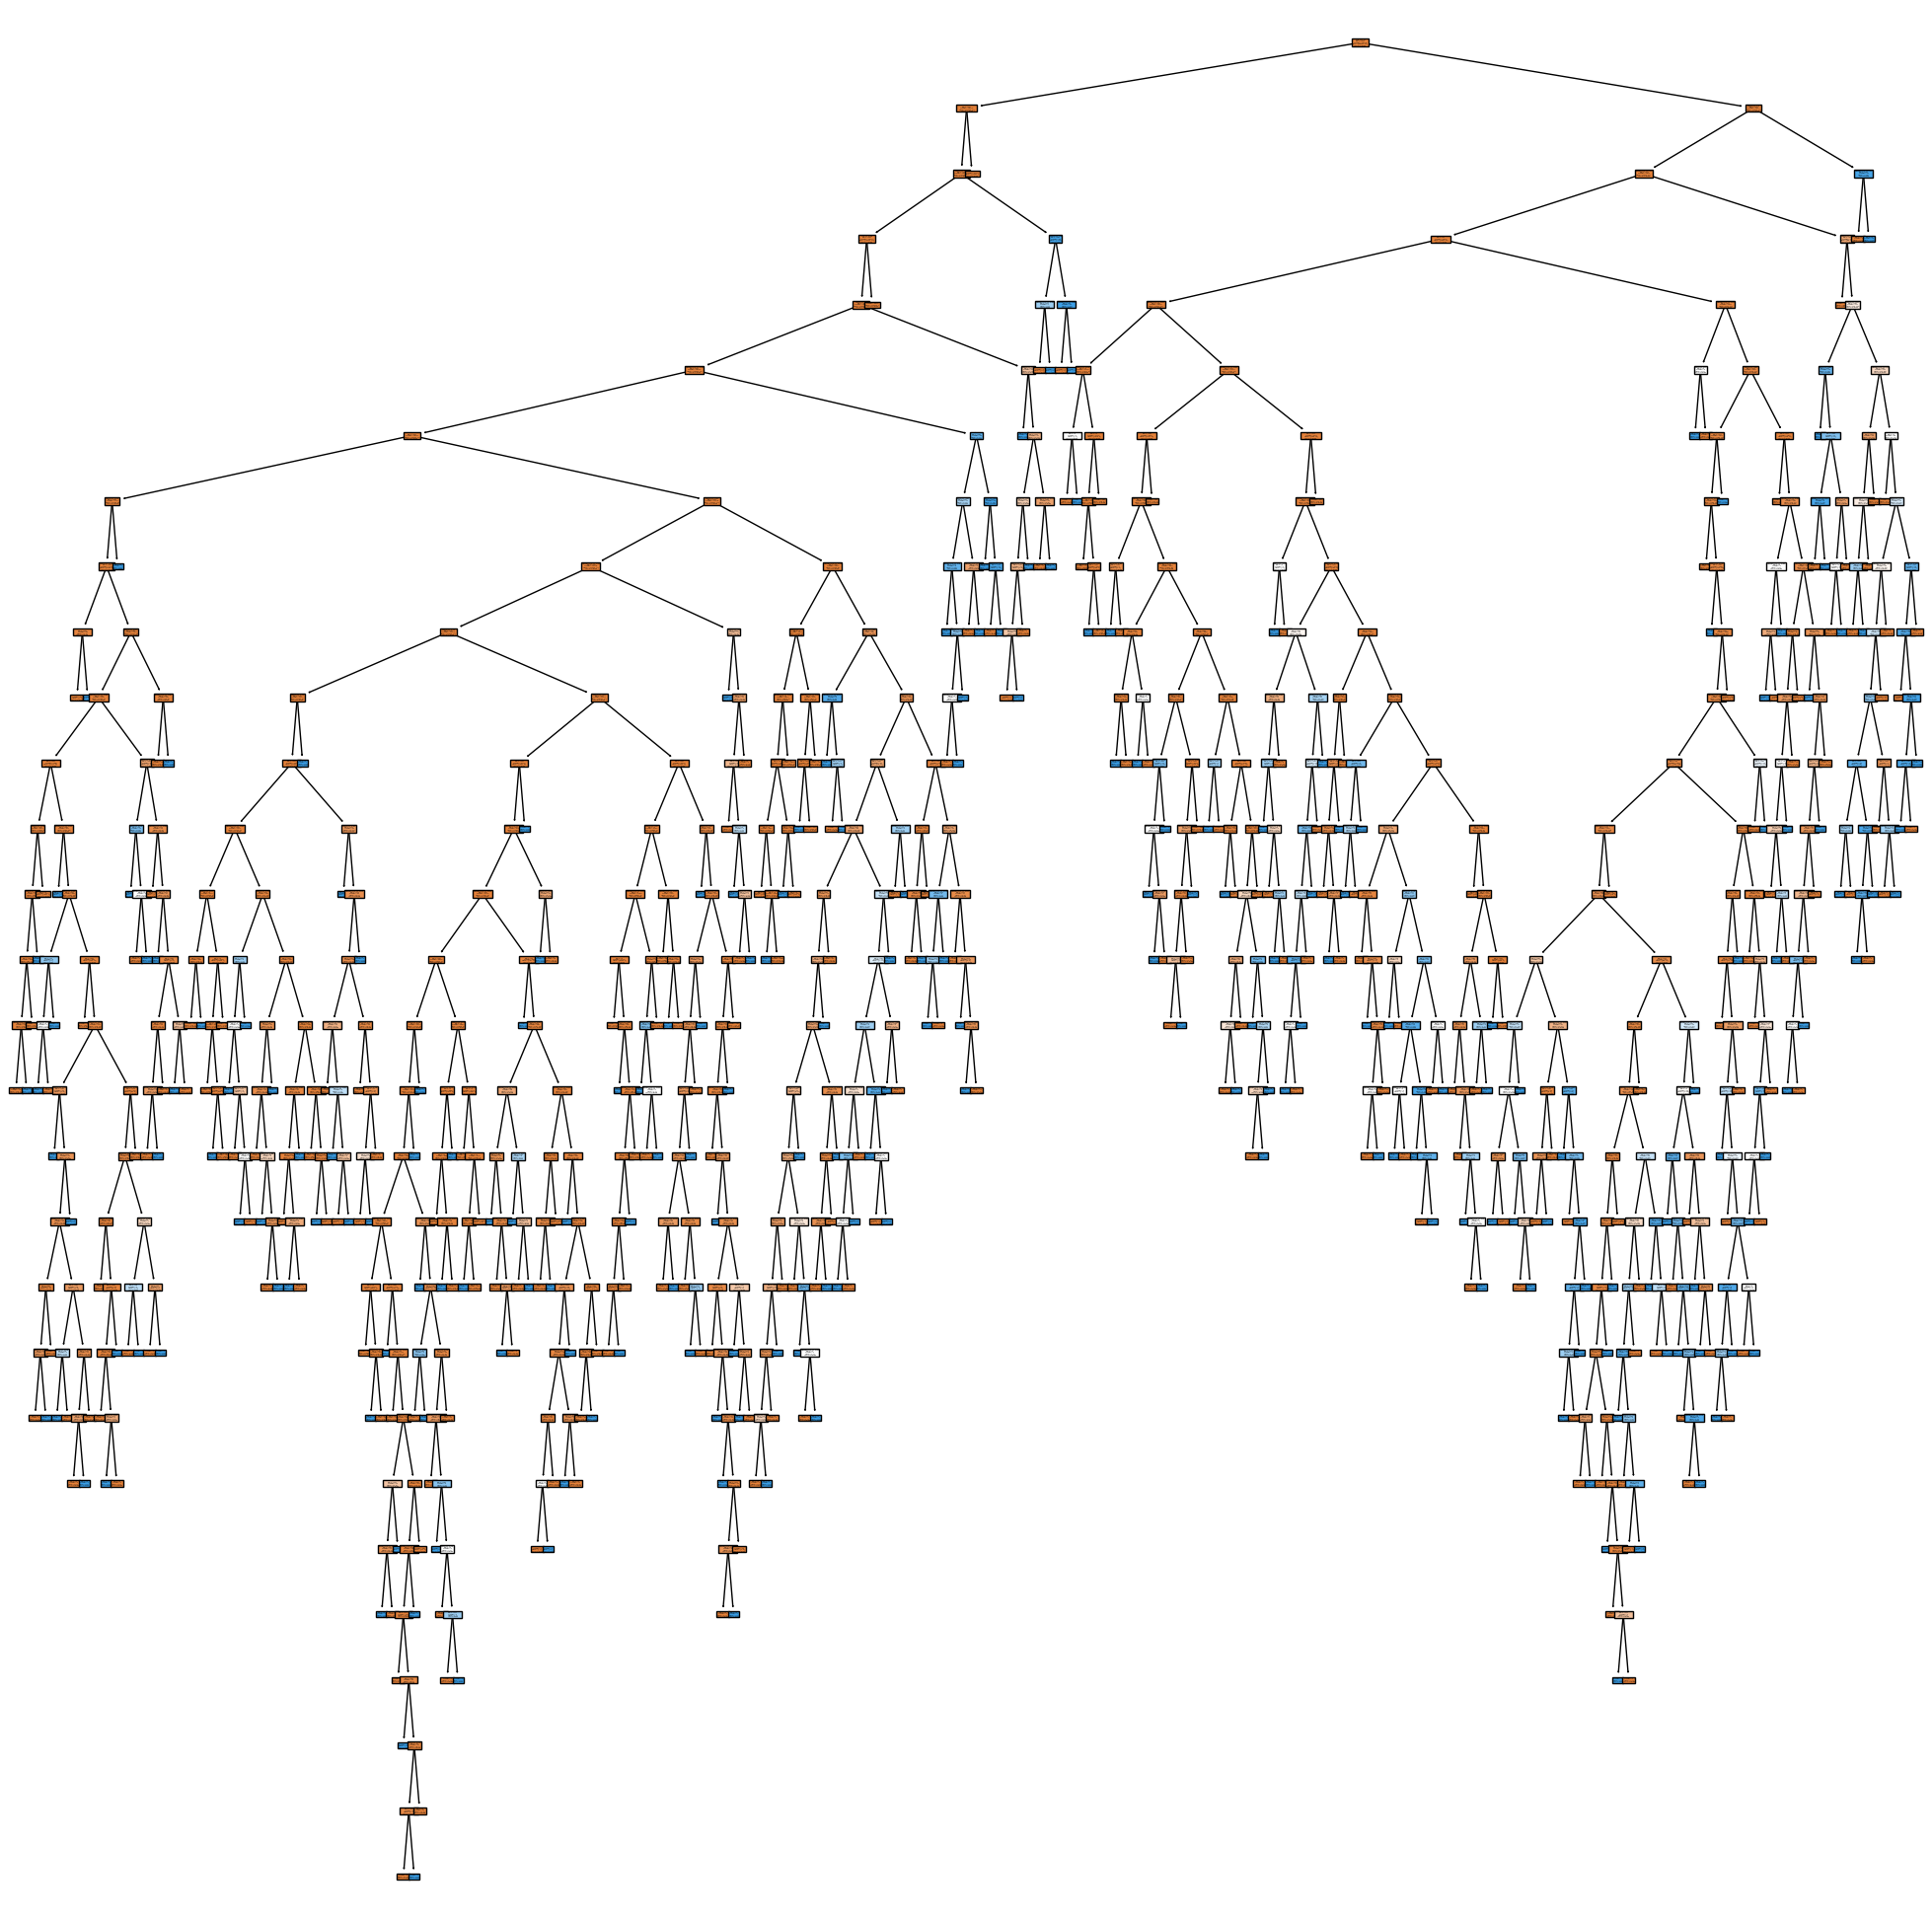

In [29]:
plt.figure(figsize=(25,25))
plot_tree(model3.estimators_[0], feature_names=['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig'], class_names=['No Fraud', 'Fraud'], filled=True)
plt.savefig('Random_Forest.png')
plt.show()

In [21]:
confusion_matrix_Random = confusion_matrix(y_pred_Random,y_test)
classification_report_Random = classification_report(y_pred_Random,y_test)
accuracy_score_Random = accuracy_score(y_pred_Random,y_test)
print(confusion_matrix_Random,classification_report_Random,accuracy_score_Random)

[[261824     92]
 [    42    184]]               precision    recall  f1-score   support

           0       1.00      1.00      1.00    261916
           1       0.67      0.81      0.73       226

    accuracy                           1.00    262142
   macro avg       0.83      0.91      0.87    262142
weighted avg       1.00      1.00      1.00    262142
 0.9994888266664632


# Naive Bayes 

In [22]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(x_train,y_train)
y_pred_NB = model5.predict(x_test)
y_pred_NB

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
confusion_matrix_NB = confusion_matrix(y_pred_NB,y_test)
classification_report_NB = classification_report(y_pred_NB,y_test)
accuracy_score_NB = accuracy_score(y_pred_NB,y_test)
print(confusion_matrix_NB,classification_report_NB,accuracy_score_NB)

[[257739    195]
 [  4127     81]]               precision    recall  f1-score   support

           0       0.98      1.00      0.99    257934
           1       0.29      0.02      0.04      4208

    accuracy                           0.98    262142
   macro avg       0.64      0.51      0.51    262142
weighted avg       0.97      0.98      0.98    262142
 0.9835127526302538


# XGBClassifier


In [26]:
from xgboost import XGBClassifier
model6 = XGBClassifier()
model6.fit(x_train,y_train)
y_pred_XG = model6.predict(x_test)
y_pred_XG

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
confusion_matrix_XG = confusion_matrix(y_pred_XG,y_test)
classification_report_XG = classification_report(y_pred_XG,y_test)
accuracy_score_XG = accuracy_score(y_pred_XG,y_test)
print(confusion_matrix_XG,classification_report_XG,accuracy_score_XG)

[[261827     89]
 [    39    187]]               precision    recall  f1-score   support

           0       1.00      1.00      1.00    261916
           1       0.68      0.83      0.75       226

    accuracy                           1.00    262142
   macro avg       0.84      0.91      0.87    262142
weighted avg       1.00      1.00      1.00    262142
 0.9995117150246813


In [41]:
models = ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Naive Bayes','XGboost Classifier']
accuracies = [0.9991569454723013,0.999397273233591,0.9994888266664632,0.9835127526302538,0.9995117150246813]

import plotly.express as px 
# Create a bar chart using Plotly Express
fig = px.bar(x=models, y=accuracies, title='Comparison of Model Accuracies', labels={'x': 'Models', 'y': 'Accuracy'})
fig.update_traces(marker_color='blue')
fig.write_html('model_accuracies.html')
# Show the interactive plot
fig.show()

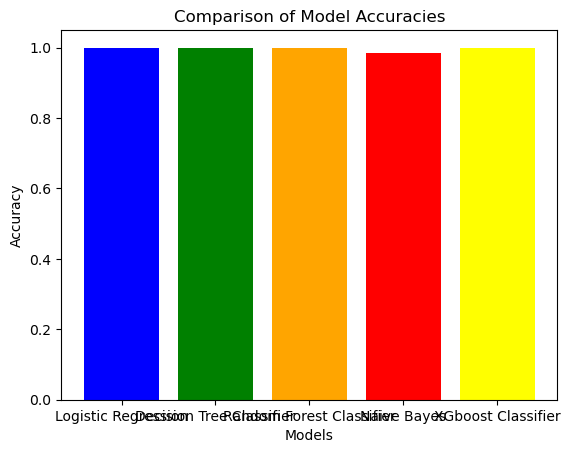

In [40]:
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red','yellow'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Show the plot
plt.show()

In [39]:
import pickle
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(model6, model_file)